<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EC%B4%88%EC%9D%B4%EC%8A%A4%EB%AA%A8%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up modules

In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import theano

%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

     |████████████████████████████████| 1.4MB 7.0MB/s 
     |████████████████████████████████| 4.3MB 24.7MB/s 
     |████████████████████████████████| 296kB 46.0MB/s 
     |████████████████████████████████| 911kB 6.5MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


# Logit 초이스 모형

In [2]:
import sklearn
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
import seaborn as sea
sea.set()
sea.set
%matplotlib inline


# 데이터를 불러오자

In [3]:
data = sea.load_dataset('iris', header=None, names=[0, 1, 2, 3, 'TYPE'])
data = data.drop(index=0)   # 첫 행을 삭제
data

,0,1,2,3,TYPE
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [4]:
data['TYPE']= LabelEncoder().fit_transform(data['TYPE'])   # type을 index 로 변환
data

,0,1,2,3,TYPE
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


In [5]:
y_obs = data['TYPE'].values
x_n = data.columns[:-1]
x = data[x_n].values
x = StandardScaler().fit_transform(x)

ndata = x.shape[0]
nparam = x.shape[1]
nclass = len(data['TYPE'].unique())  # alternative의 숫자

print( y_obs.shape, x.shape )


(150,) (150, 4)


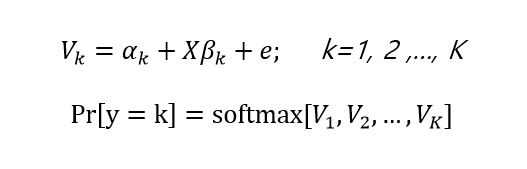

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alfa]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:11<00:00, 211.85it/s]
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:

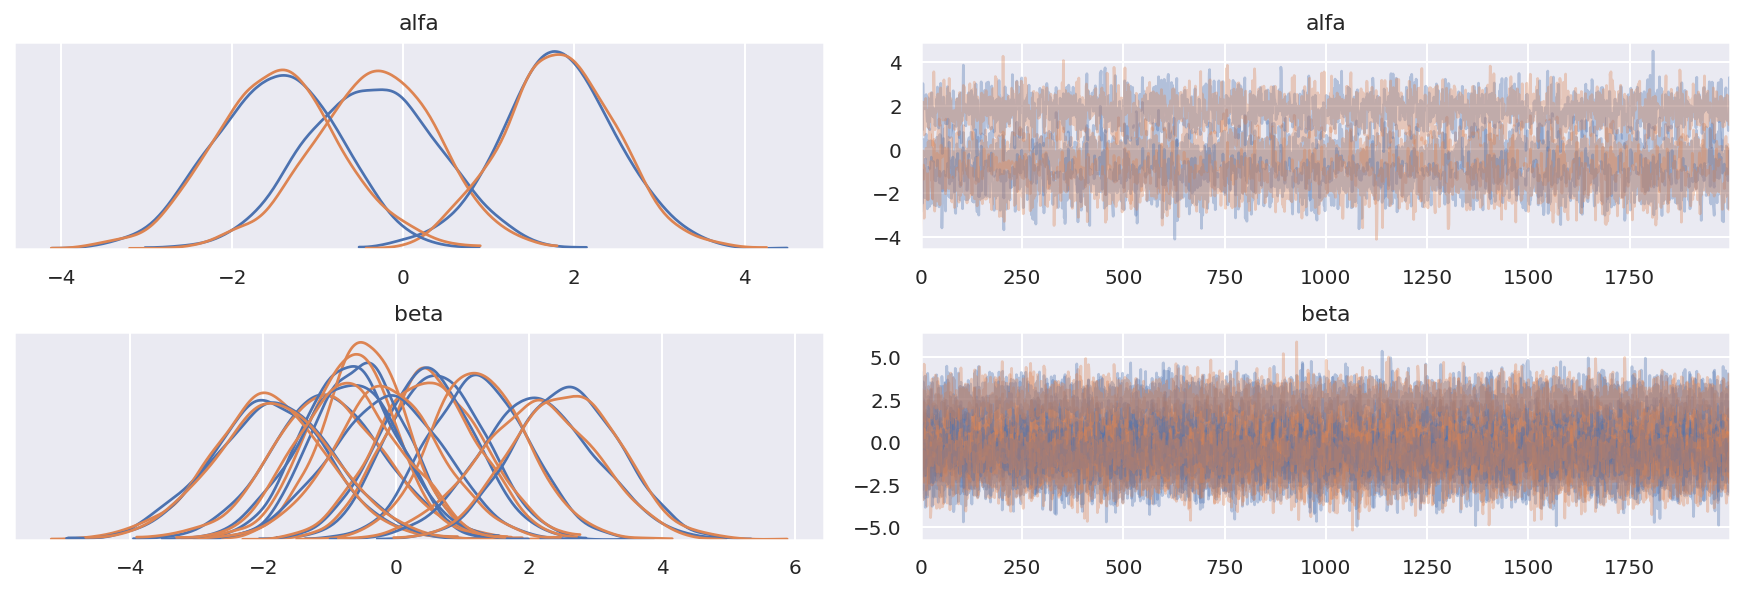

In [6]:
import theano.tensor as tt
with pm.Model() as choice_model:
    X_data = pm.Data('X_data', x)
    y_obs_data = pm.Data('y_obs_data', y_obs)
    alfa = pm.Normal('alfa', mu=0, sd=1, shape=nclass)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(nparam, nclass))
    mu = tt.dot(X_data, beta) + alfa
    p = tt.nnet.softmax(mu)
    yl = pm.Categorical('obs', p=p, observed=y_obs_data)
    trace = pm.sample(2000)
    idata = az.from_pymc3(trace)
    pm.traceplot(idata)

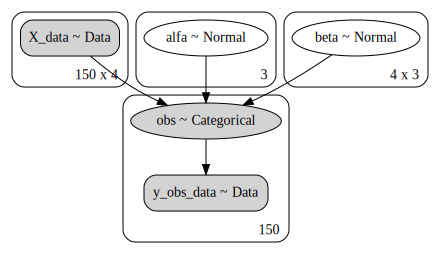

In [7]:
pm.model_to_graphviz(choice_model)

# What about normalization!!

In [9]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alfa[0],-0.360,0.742,-1.674,1.116,0.013,0.010,3230.0,2858.0,3234.0,3251.0,1.0
alfa[1],1.819,0.668,0.512,3.058,0.013,0.009,2684.0,2684.0,2671.0,2934.0,1.0
alfa[2],-1.493,0.727,-2.845,-0.145,0.014,0.010,2756.0,2513.0,2757.0,2813.0,1.0
"beta[0,0]",-1.039,0.854,-2.546,0.687,0.014,0.011,3798.0,3158.0,3821.0,2836.0,1.0
"beta[0,1]",0.585,0.719,-0.711,1.958,0.012,0.010,3360.0,2778.0,3365.0,2995.0,1.0
"beta[0,2]",0.442,0.730,-0.966,1.740,0.013,0.010,3367.0,2938.0,3370.0,3186.0,1.0
"beta[1,0]",1.227,0.729,-0.075,2.647,0.012,0.009,3479.0,3131.0,3487.0,3062.0,1.0
"beta[1,1]",-0.519,0.647,-1.734,0.683,0.013,0.010,2326.0,2193.0,2332.0,2486.0,1.0
"beta[1,2]",-0.700,0.676,-1.980,0.541,0.013,0.010,2787.0,2449.0,2791.0,2565.0,1.0
"beta[2,0]",-1.948,0.876,-3.686,-0.375,0.014,0.010,4112.0,3792.0,4117.0,2903.0,1.0
